# Install Packages

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Load dataset

## Store the data set in a variable

The iris data frame contains the length and width of sepals and petals including the target column which is the numerical representation of classes of Iris flowers that we need to classify (eg: Setosa(0), Versicolor(1),  Virginica(2) ).


In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris['target'][:5]

array([0, 0, 0, 0, 0])

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Convert to pandas dataframe

- data=np.c_[iris['data'], iris['target']]: 
    - The data parameter of the DataFrame constructor is being assigned the value of np.c_[iris['data'], iris['target']]. Here, np.c_ is a numpy function that concatenates the arrays along the second axis (columns in this context). iris['data'] contains the features of the Iris dataset (sepal length, sepal width, petal length, and petal width), and iris['target'] contains the target variable (species of each iris flower as integers). By concatenating these two arrays, you get a single array where the last column represents the species of each iris flower.

- columns=iris['feature_names'] + ['target']
    - This specifies the column names of the DataFrame. iris['feature_names'] is a list of feature names from the Iris dataset (the names of the measurements like sepal length, sepal width, etc.). By adding + ['target'] to this list, you're appending the string 'target' to the list of column names, effectively naming the last column (which contains the species of each iris flower) as 'target'.

In [7]:
iris = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Confirm there are different target values

In [8]:
iris['target'].unique()

array([0., 1., 2.])

## Add species column

Since the species is only represented as an int we will add a column for the species to make it easier to understand

In [9]:
species = []

for target in iris['target']:
    match target:
        case 0:
            species.append('setosa')
        case 1:
            species.append('versicolor')
        case 2:
            species.append('virginica')
        case _:
            species.append('unknown')
            
iris['species'] = species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### Display some statistical info

In [11]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [12]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Plot data

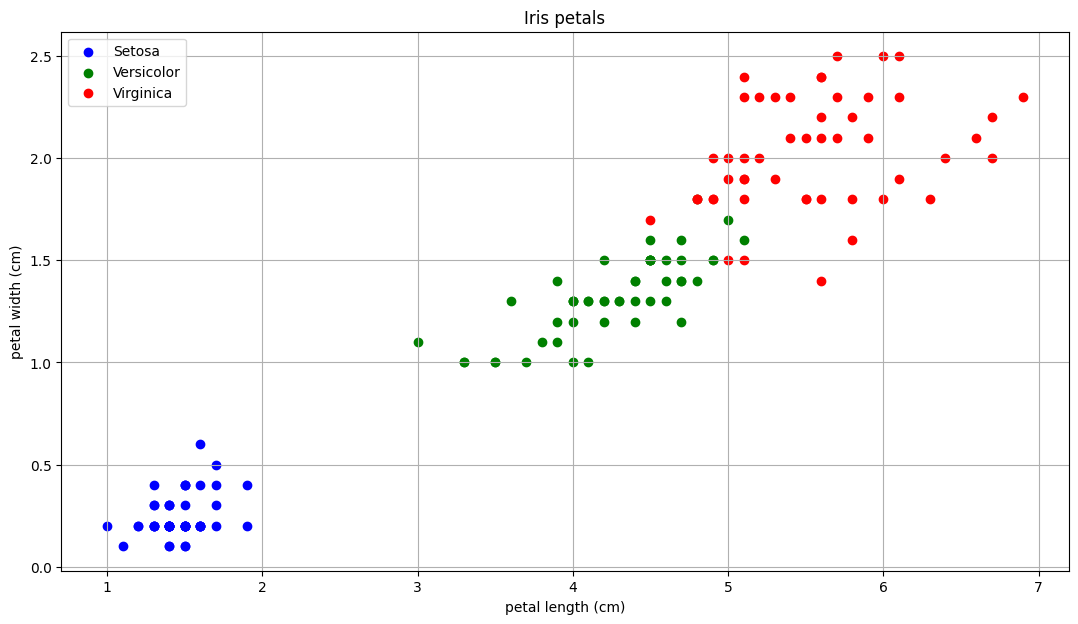

In [13]:
import matplotlib.pyplot as pt

import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

# Perform Classification

## Create test train split

In [14]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

## Soft max function

Article on Logistic Regression
[here](https://www.pycodemates.com/2022/03/multinomial-logistic-regression-definition-math-and-implementation.html)

The softmax function is a mathematical tool widely used in machine learning and deep learning, particularly in the context of classification tasks. It takes a vector of real numbers and transforms it into a probability distribution, where each element of the vector is converted into a value between 0 and 1, and the sum of all these values equals 1. This transformation allows the softmax function to convert raw scores or logits from a model into interpretable probabilities, making it especially useful in multiclass classification problems where the goal is to assign an input to one of several possible classes.

### How Softmax Works

The softmax function operates by first exponentiating each element of the input vector, then dividing each exponentiated value by the sum of all exponentiated values in the vector. Mathematically, given an input vector $z$ of real numbers, the softmax of the $i$-th element of $z$ is calculated as:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

where:
- $e$ is the base of the natural logarithm, approximately equal to 2.718.
- $z_{i}$ is the $i$-th element of the input vector $z$.
- The denominator is the sum of the exponentials of all elements in the input vector, ensuring that the output values sum up to 1.

### Why Softmax is Useful

Softmax is particularly valuable in neural networks that perform classification tasks. By converting the final layer's outputs (logits) into probabilities, softmax provides a clear and interpretable output from the model. For instance, in a neural network designed to classify images into categories such as dogs, cats, and birds, the softmax layer would output a probability distribution over these categories, indicating the model's confidence in each possible classification.

### Implementation Example

Implementing the softmax function in Python is straightforward, especially with the help of libraries like NumPy. Here's a simple example:

```python
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtracting max(x) for numerical stability
    return e_x / e_x.sum()

# Example input vector
logits = np.array([2.0, 1.0, 0.1, 2.3])

# Applying softmax
softmax_output = softmax(logits)

print("Input logits:", logits)
print("Softmax output:", softmax_output)
print("Sum of probabilities:", softmax_output.sum())
```

This code defines a softmax function that takes an input vector `x`, applies the softmax transformation, and returns a vector of probabilities. The subtraction of `np.max(x)` from `x` before exponentiation is a common practice to improve numerical stability by preventing potential overflow/underflow issues.

### Conclusion

The softmax function is a critical component in machine learning for transforming logits into probabilities. Its ability to provide interpretable, normalized outputs makes it indispensable for classification tasks, especially those involving multiple classes[1][2][3][4][5].

The model will then choose the highest of all the probabilities to determine the class the input will fall under

Citations:

[1] https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78

[2] https://victorzhou.com/blog/softmax/

[3] https://python.plainenglish.io/softmax-explanation-fa3954647e43?gi=a5df1b76bec5

[4] https://www.pinecone.io/learn/softmax-activation/

[5] https://towardsdatascience.com/what-is-the-softmax-function-teenager-explains-65495eb64338

## Train the model

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

## Training predictions


In [16]:
training_prediction = log_reg.predict(X_train)

training_prediction

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

In [17]:
test_prediction = log_reg.predict(X_test)

test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

## Measuring performance

Performance measures are used to evaluate the effectiveness of classifiers on different datasets with different characteristics. For classification problems, there are three main measures for evaluating the model: 

- Precision(the accuracy of positive predictions or the number of most relevant values from retrieved values.)
- Recall(ratio of positive instances that are truly detected by the classifier)
- Confusion matrix.

## Performance in training

Components of a Classification Report
- Precision: 
    - Indicates the accuracy of positive predictions. It is the ratio of true positives to the sum of true and false positives. High precision relates to a low false positive rate.
- Recall (Sensitivity): 
    - Measures the ability of a classifier to find all positive instances. It is the ratio of true positives to the sum of true positives and false negatives.
- F1-Score: 
    - The weighted harmonic mean of precision and recall. It takes both false positives and false negatives into account. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.
- Support: 
    - The number of actual occurrences of the class in the dataset. It is useful for identifying the distribution of classes within the data.

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score    support
0.0            1.000000  1.000000  1.000000  21.000000
1.0            0.923077  0.888889  0.905660  27.000000
2.0            0.892857  0.925926  0.909091  27.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.938645  0.938272  0.938250  75.000000
weighted avg   0.933736  0.933333  0.933310  75.000000


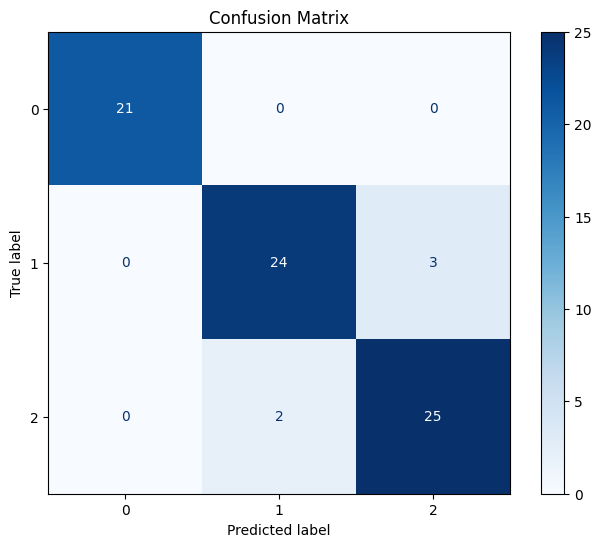

In [18]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
classification_df = pd.DataFrame.from_dict(metrics.classification_report(y_train, training_prediction, digits=3, output_dict=True)).transpose()
print(classification_df)


# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Optional: Adjust the figure size as needed
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_train, training_prediction))
disp.plot(cmap='Blues', ax=ax)  # You can change the color map to your preference
ax.set_title('Confusion Matrix')  # Optional: Set a title for the plot
plt.show()

## Performance in testing

Precision, Recall, Confusion matrix, in testing

              precision  recall  f1-score  support
0.0                 1.0     1.0       1.0     29.0
1.0                 1.0     1.0       1.0     23.0
2.0                 1.0     1.0       1.0     23.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     75.0
weighted avg        1.0     1.0       1.0     75.0


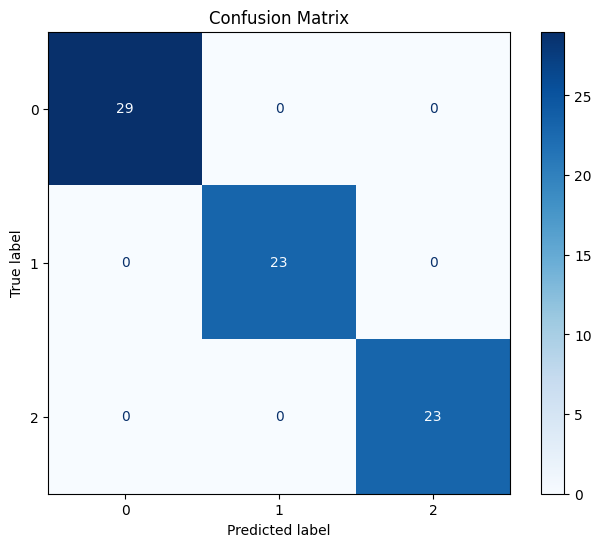

In [19]:
print("Precision, Recall, Confusion matrix, in testing\n")

classification_df = pd.DataFrame.from_dict(metrics.classification_report(y_test, test_prediction, digits=3, output_dict=True)).transpose()
print(classification_df)


# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Optional: Adjust the figure size as needed
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, test_prediction))
disp.plot(cmap='Blues', ax=ax)  # You can change the color map to your preference
ax.set_title('Confusion Matrix')  # Optional: Set a title for the plot
plt.show()

## Accuracy scores

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, test_prediction)

1.0

# Package the model

In [23]:
import pickle
pickle.dump(log_reg, open("iris_model.pkl", "wb"))